In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 主成分分析
取得したデータが２次元とは限らず、２次元座標系にプロットできるとは限らない。主成分分析とはこのようなときにデータの次元を圧縮する手法である。  
主成分分析は元データの情報をできるだけ保持しながら元の特徴量の線形結合で表せる軸を導く

データの各点$(x_i, y_i) \in \mathbb{R}^2$を$xy$平面上の原点を通る直線に射影し、その直線上$(\hat{x}_i, \hat{y}_i)$で近似することを考える。この直線は単位ベクトル$\bm{u} \in \mathbb{R}^2$と媒介変数$a \in \mathbb{R}$を用いて以下の式で表せる。
$$
\begin{pmatrix}
\hat{x}_i \\ \hat{y}_i
\end{pmatrix}
= a_i \bm{u}
$$
また$|a_i|$は1$(x_i, y_i)$の原点からの距離を示す。  
ここで$y = \frac{1}{2} x$を例に考える。$\|\bm{u}\|^2=1$より、
$$
\bm{u} = \frac{1}{\sqrt{2^2 + 1^2}}
\begin{pmatrix}
2 \\ 1
\end{pmatrix}
= \begin{pmatrix}
\frac{2}{\sqrt{5}} \\ \frac{1}{\sqrt{5}}
\end{pmatrix}
$$
$(x_i, y_i)$を$\bm{u}$に射影したとき、$a_i$は、
$$
\begin{align}
    a_i &= \left \|
    \begin{pmatrix}
        x_i \\ y_i 
    \end{pmatrix}
    \right \| cos \theta \notag \\
    &= \left \|
    \begin{pmatrix}
        x_i \\ y_i
    \end{pmatrix}
    \right \| \frac{
        \begin{pmatrix}
            x_i \\ y_i
        \end{pmatrix}
        ^\top \bm{u}
    }
    {
        \left \|
        \begin{pmatrix}
            x_i \\ y_i
        \end{pmatrix}
        \right \| \| \bm{u} \|
    } \notag \\
    &= \begin{pmatrix}
        x_i \\ y_i
    \end{pmatrix}
    ^\top \bm{u} \notag \\
\end{align}
$$
ただし、$\theta$は$(x_i, y_i)$と$\bm{u}$のなす角
よって、
$$
a_i = (-7 \quad 2)\begin{pmatrix}
    \frac{2}{\sqrt{5}} \\ \frac{1}{\sqrt{5}}
\end{pmatrix}
$$


### 残差
近似の良さを定量化するために残差$\epsilon$を導入する。回帰の場合は回帰曲線（直線）とデータの$y$座標の距離を残差としていたが、主成分分析の場合は直線とデータとの距離を残差と定義する。

(0.52, 11.08, -0.010000000000000009, 22.21)

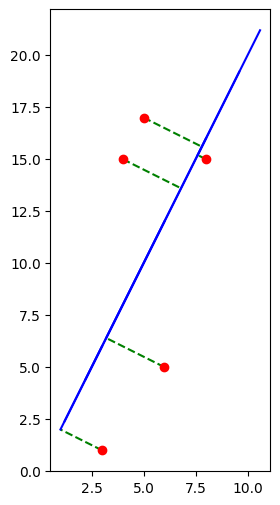

In [18]:
#@title 残差の描画

data = np.array([[4, 15], [6, 5], [5, 17], [8, 15], [3, 1]])

x = np.arange(0, 10, 0.1)
y1 = 2 * x

La = 2
Lb = 0

ax = np.array(data[:, 0])
ay = np.array(data[:, 1])
hx = (La*(ay-Lb)+ax)/(La**2+1)
hy = La*(La*(ay-Lb)+ax)/(La**2+1)+Lb

if ax.all() > hx.all():
    Lx_max = ax + abs(ax - hx) / 1
    Lx_min = hx - abs(ax - hx) / 1
else:
    Lx_max = hx + abs(ax - hx) / 1
    Lx_min = ax - abs(ax - hx) / 1

Lx = np.array([Lx_min, Lx_max])
Ly = La * Lx + Lb
# fig = plt.figure(figsize=(8, 8))


# plt.rcParams['mathtext.fontset'] = 'cm'

# ax.plot(x, y1)

fig = plt.figure(figsize=(6, 6))
a = fig.add_subplot(111)
a.set_xlim(0, 18)
a.set_ylim(-2, 18)
plt.plot(Lx, Ly, color='blue') # 直線Lプロット
plt.scatter(ax, ay, color='red') # 点Aプロット
plt.plot([ax, hx],[ay, hy], color='green', linestyle='--', zorder=0) # 垂線プロット（点A-点H）
plt.axis('scaled') # 垂直に見えるようにスケール調整

# ax.scatter(data[:, 0], data[:, 1], color='r')
# for i, m in enumerate(data[:, 0]):
#     hx = (1.5 * data[i, 1] + data[i, 0]) / (1.5 ** 2 + 1)
#     hy = 1.5 * (1.5 * data[i, 1] + data[i, 0]) / (1.5 ** 2 + 1)
    
#     y_p = -2 * x + data[i, 1] + 2 * data[i, 0]
    
#     ax.plot(x, y_p, color='r', linestyle='--')    
#     # print(y_p)
    
    
# plt.plot([ax, hx],[ay, hy], color='green', linestyle='--', zorder=0) 


上図より、
$$
x_i^2 + y_i^2 = a_i^2 + \epsilon_i^2
$$
今までは$\bm{u}$を固定して考えていたが、この$\epsilon$を考慮したうえでこのベクトルを検討したい。 残差$\epsilon$は以下で定義する。
$$
\epsilon = \sqrt{(x - \hat{x})^2 - (y - \hat{y})^2}
$$
回帰同様に二乗残差で評価するので、
$$
\sum^{}_{i} \epsilon^2 
$$
またN個のデータに対して以下が成り立つ。
$$
\sum^{N}_{i=1} (a_i^2 + \epsilon_i^2) = \sum^{N}_{i=1} (x_i^2 + y_i^2)
$$
よって$\sum\limits^{N}_{i=1} \epsilon_i^2$が最小のとき$\sum\limits^{N}_{i=1} a_i^2$は最大となるので求める単位ベクトル$\bm{u}$は、
$$
\begin{align}
\bm{u} &= \mathop{argmin}\limits_{\|\bm{u}\|=1} \sum\limits^{N}_{i=1} \epsilon_i^2 \notag \\
&= \mathop{argmin}\limits_{\|\bm{u}\|=1} \sum^{N}_{i=1} (x_i^2 + y_i^2) - \sum^{N}_{i=1} a_i^2 \notag \\
&= \mathop{argmax}\limits_{\|\bm{u}\|=1} \sum^{N}_{i=1} a_i^2 \notag 
\end{align}
$$
データの重心が原点のとき$a_i$の和も0なので、
$$
\sum^{N}_{i=1} a_i = \sum^{N}_{i=1} 
\begin{pmatrix}
    x_i \\ y_i
\end{pmatrix}
^\top \bm{u}
= 0 \\
\therefore \frac{1}{N} \sum^{N}_{i=1} a_i^2 = 0 \\
\therefore Var[\bm{a}] = \frac{1}{N} \sum^{N}_{i=1} (a_i - \bar{a})^2 = \frac{1}{N} \sum^{N}_{i=1} a_i^2 \\
\therefore \bm{u} = \mathop{argmax}\limits_{\|\bm{u}\|=1} Var[\bm{a}]
$$
よって、$\sum\limits^{N}_{i=1} \epsilon_i^2$を最小にすることは射影された点の分散を最大化させることと等価である。

### 第１主成分
目的関数$J$は
$$
\begin{align}
J = \sum^{N}_{i=1} a_i^2 \notag \\
&= \sum^{N}_{i=1} (a_1, a_2, \cdots, a_N)
\begin{pmatrix}
a_i \\ \
\end{pmatrix}
\end{align}
$$